# **NYC Taxi Trip duration**
This notebook is my submission for the New York City Taxi Trip Duration Challenge on Kaggle.com.
The goal is to predict the duration of taxi rides in New York City.

In [1]:
# Importing Python libraries for data analysis, processing, modelling and visualization.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'test', 'sample_submission', 'train', 'train.csv', 'sample_submission.csv']


# Exploratory analysis

In [2]:
# Loading data and checking it
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [3]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
# check desired output
df_sample = pd.read_csv('../input/sample_submission.csv')
df_sample.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [6]:
# Checking whether ID is unique or not.
len(df_train.index) == df_train.index.nunique()

True

In [7]:
len(df_test.index) == df_test.index.nunique()

True

In [8]:
# Checking for null values
df_train.isnull().values.any()

False

In [9]:
df_test.isnull().values.any()

False

In [10]:
# Quick analysis.
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [11]:
df_test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [14]:
# Changing data type to handle dates in a easier way
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])

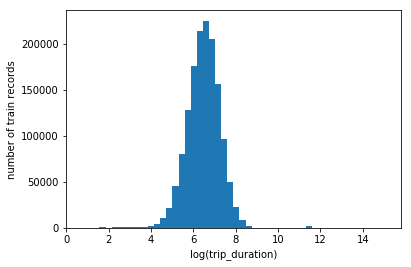

In [15]:
#Plotting trip duration
df_train['log_trip_duration'] = np.log(df_train['trip_duration'].values + 1)
plt.hist(df_train['log_trip_duration'].values,bins=50)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

In [16]:
# Splitting the dates in several columns to find out if any particulars months/days/hours/minutes have a different behavior 
df_train.loc[:, 'pickup_month'] = df_train['pickup_datetime'].dt.month
df_train.loc[:, 'pickup_weekday'] = df_train['pickup_datetime'].dt.weekday
df_train.loc[:, 'pickup_day'] = df_train['pickup_datetime'].dt.day
df_train.loc[:, 'pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train.loc[:, 'pickup_minute'] = df_train['pickup_datetime'].dt.minute

df_train.loc[:, 'dropoff_month'] = df_train['dropoff_datetime'].dt.month
df_train.loc[:, 'dropoff_weekday'] = df_train['dropoff_datetime'].dt.weekday
df_train.loc[:, 'dropoff_day'] = df_train['dropoff_datetime'].dt.day
df_train.loc[:, 'dropoff_hour'] = df_train['dropoff_datetime'].dt.hour
df_train.loc[:, 'dropoff_minute'] = df_train['dropoff_datetime'].dt.minute


df_test.loc[:, 'pickup_month'] = df_test['pickup_datetime'].dt.month
df_test.loc[:, 'pickup_weekday'] = df_test['pickup_datetime'].dt.weekday
df_test.loc[:, 'pickup_day'] = df_test['pickup_datetime'].dt.day
df_test.loc[:, 'pickup_hour'] = df_test['pickup_datetime'].dt.hour
df_test.loc[:, 'pickup_minute'] = df_test['pickup_datetime'].dt.minute


In [17]:
# Creating a fonction to calculate distance between our lat/long pickup and dropoff coordinates.
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(longitude1, latitude1, longitude2, latitude2):
  #  Radius of Earth in km
    R = 6373.0

    lat1 = radians(latitude1)
    lon1 = radians(longitude1)
    lat2 = radians(latitude2)
    lon2 = radians(longitude2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # Return distance in km
    return R * c

def add_distance(df):
    return df.apply(lambda row: calculate_distance(
         row.pickup_longitude,
         row.pickup_latitude,
         row.dropoff_longitude,
         row.dropoff_latitude
     ), axis=1)

df_train['distance_km'] = add_distance(df_train)
df_test['distance_km'] = add_distance(df_test)
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_month,pickup_weekday,pickup_day,pickup_hour,pickup_minute,dropoff_month,dropoff_weekday,dropoff_day,dropoff_hour,dropoff_minute,distance_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,3,0,14,17,24,3,0,14,17,32,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,6,6,12,0,43,6,6,12,0,54,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,1,1,19,11,35,1,1,19,12,10,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,4,2,6,19,32,4,2,6,19,39,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,3,5,26,13,30,3,5,26,13,38,1.188962


In [18]:
# Categorical Data treatment

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train['store_and_fwd_flag'])
df_train['store_and_fwd_flag'] = le.transform(df_train['store_and_fwd_flag'])
df_test['store_and_fwd_flag'] = le.transform(df_test['store_and_fwd_flag'])

le.fit(df_train['vendor_id'])
df_train['vendor_id'] = le.transform(df_train['vendor_id'])
df_test['vendor_id'] = le.transform(df_test['vendor_id'])

In [19]:
# Variables we will be using to train
train_variables = ["vendor_id","passenger_count","store_and_fwd_flag","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","pickup_month","pickup_weekday","pickup_day","pickup_hour",'pickup_minute',"distance_km"]

In [20]:
y = np.log1p(df_train['trip_duration'])
df_train["trip_duration"] 
X = df_train[train_variables]
X.shape, y.shape


((1458644, 13), (1458644,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1166915, 13), (1166915,), (291729, 13), (291729,))

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=1337)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((875186, 13), (875186,), (291729, 13), (291729,))

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1337,n_jobs=-1,bootstrap=True,n_estimators=20)
fit = rf.fit(X_train, y_train)

In [24]:
#Pray for good fortune
score = rf.score(X_valid, y_valid)
print(score)

0.7254548412693131


In [25]:
test_columns = X_train.columns
predictions = rf.predict(df_test[test_columns])

In [26]:
submission = pd.DataFrame({'id': df_test.id, 'trip_duration': np.expm1(predictions)})
submission.head()

,id,trip_duration
0,id3004672,731.300275
1,id3505355,620.633159
2,id1217141,453.432254
3,id2150126,1018.879455
4,id1598245,346.885780


In [27]:
submission.to_csv("submission_florian_coupechoux_nyc_taxi.csv", index=False)
